# Zomato Data Analysis

## Importing libraries

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [355]:
df = pd.read_csv("Zomato data .csv")
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
32,Sweet Truth,Yes,No,3.9/5,35,500,Dining
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9/5,25,200,Dining
87,Krishna Sagar,No,No,3.5/5,31,200,Dining
101,Mane Thindi,No,No,3.7/5,130,200,Dining


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [357]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


## Data Cleaning and Preprocessing

In [359]:
df['rate'] = df['rate'].str.split('/5').str[0]


In [360]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [361]:
df['rate'] = df['rate'].astype('float' )

## 1. What type of Restaurants do majority of customers order from ?

Text(0.5, 1.0, 'Customer interest in type of Restaurant')

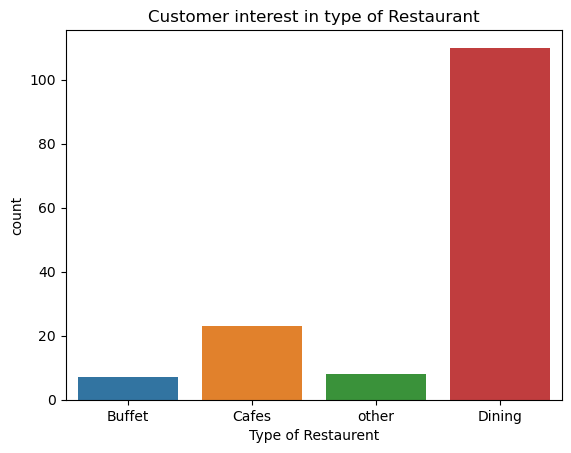

In [363]:
sns.countplot( x=df['listed_in(type)'] , data = df)
plt.xlabel('Type of Restaurent')
plt.title('Customer interest in type of Restaurant')

## observation
#### Majority of customers preffer dinning type of restaurents followed by cafes , buffet and other

## 2. How many votes has each type of restaurant recieved from customers ?

In [366]:
grouped = df.groupby('listed_in(type)')['votes'].sum().reset_index()

In [367]:
grouped

,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


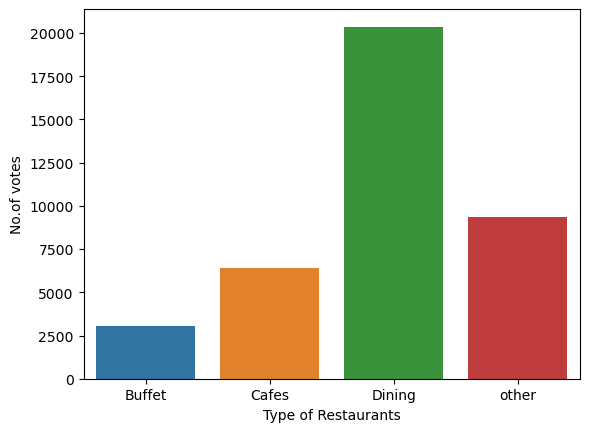

In [368]:

sns.barplot(data=grouped , x='listed_in(type)', y='votes' , errorbar=None )
plt.xlabel('Type of Restaurants')
plt.ylabel('No.of votes')
plt.show()

## Observation
### Votes are Recieved as:
#### Dinning : 20000+
#### other : 7500+
#### cafes : 5000+
#### Buffet : 2500+

## 3. What are the ratings that majority of restaurants have recieved ?

Text(0.5, 1.0, 'Maximum rating recieved from customers')

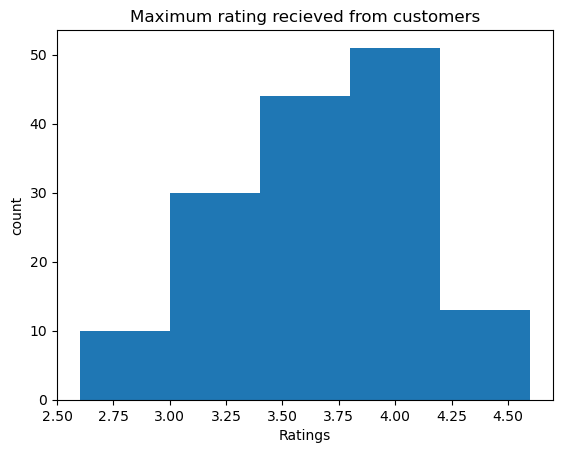

In [371]:
plt.hist( df['rate'] , bins=5)
plt.xlabel('Ratings')
plt.ylabel('count')
plt.title('Maximum rating recieved from customers')

## observation
### maximum rating lies between 3.5 to 4

## 4. What is the average spending on order by Couple orders ?

In [374]:
 couple_data =df['approx_cost(for two people)']

In [375]:
couple_data

0      800
1      800
2      800
3      300
4      600
      ... 
143    100
144    150
145    450
146    800
147    200
Name: approx_cost(for two people), Length: 148, dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

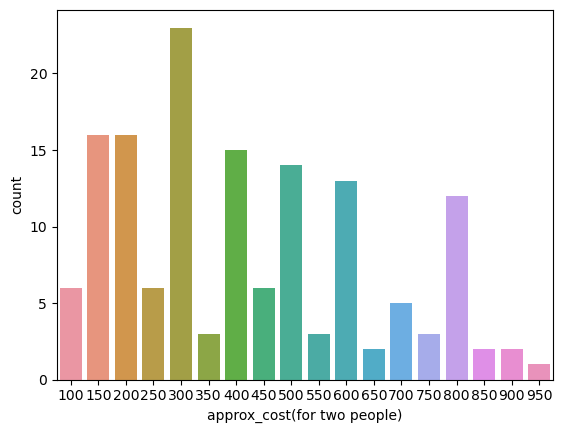

In [376]:
sns.countplot(x=couple_data)

## Observation
### average spending of couple orders is between 300 to 500

## 5. Which mode (online or offline) has recieved maximum rating ?

<Axes: xlabel='online_order', ylabel='rate'>

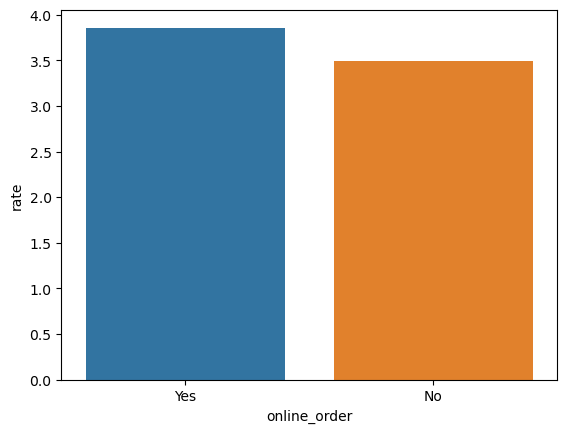

In [379]:
sns.barplot(data=df , x='online_order',y= 'rate' , errorbar=None)

## Observation
### Maximum rating is recived by online orders i.e 3.5+

## 6. Which type of restaurant recived more offline orders, so that zomato can provide those customers with more offers. 

In [382]:
pivot = df.pivot_table(index='listed_in(type)' , columns='online_order' , aggfunc='size')

In [383]:
pivot

online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


Text(0.5, 1.0, 'Type of order recieved by restaurants')

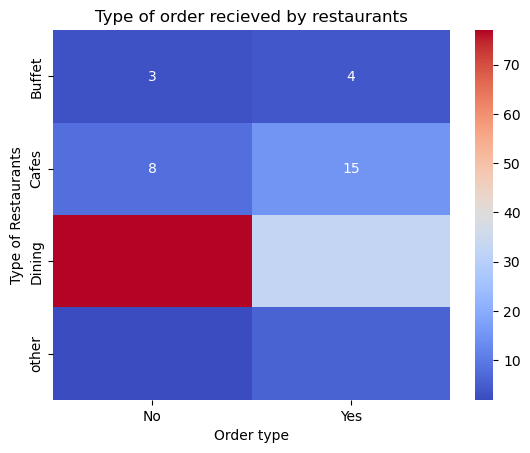

In [396]:
sns.heatmap(pivot,cmap='coolwarm',annot=True )
plt.xlabel('Order type')
plt.ylabel('Type of Restaurants')
plt.title('Type of order recieved by restaurants')

Text(0.5, 1.0, 'Type of order recieved by restaurants')

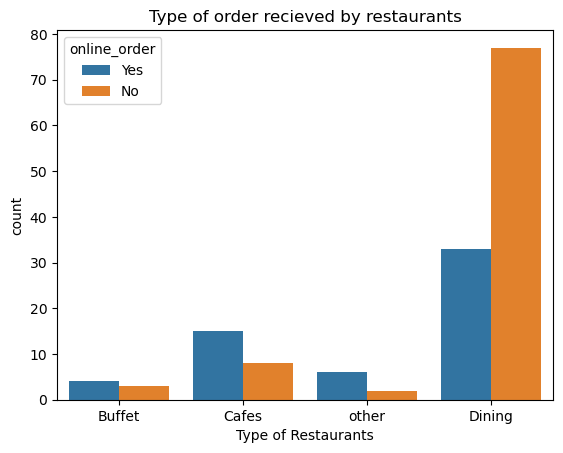

In [398]:
sns.countplot(data=df , x='listed_in(type)',hue='online_order')
plt.xlabel('Type of Restaurants')
plt.title('Type of order recieved by restaurants')

## Observation
### Dinning has maximum offline orders followed by cafes , Buffet and at last other